In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
%matplotlib inline

from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 

C:\Users\jaypr\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
ams = pd.read_csv("amazon_small.csv")
ams.head()

,idAmazon,title,description,manufacturer,price
0,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99
1,b000pgvk5s,apple final cut studio 2 (mac),final cut studio 2 delivers an integrated post...,apple,1299.00
2,b0001wn0m2,microsoft office 2004 standard (mac),office 2004 standard is designed to be a total...,microsoft,399.99
3,b00004t2un,sales skills 2.0 ages 10+,real video saltware aquarium on your desktop!p...,victory multimedia,19.95
4,b000ov0gao,hollywood volume 1,contains the following songs: 1. arthur's them...,yamaha,31.95


In [3]:
ggs = pd.read_csv("google_small.csv")
ggs.head()

,idGoogleBase,name,description,manufacturer,price
0,http://www.google.com/base/feeds/snippets/1329...,encore software 10599 - encore registry mechan...,encore software 10599 : pc tools registry mech...,NaN,25.97
1,http://www.google.com/base/feeds/snippets/1693...,adobe indesign cs3 for mac upgrade from pagemaker,system requirements powerpc g4 or g5 or intel ...,NaN,205.99
2,http://www.google.com/base/feeds/snippets/4998...,encore software 10568 - encore hoyle puzzle & ...,encore software 10568 : with old classics and ...,NaN,17.97
3,http://www.google.com/base/feeds/snippets/1695...,school zone interactive multiplication & divis...,multiplication & division introduces mutliplic...,NaN,9.45
4,http://www.google.com/base/feeds/snippets/1574...,apple software m9953z/a remote desktop 2.2 10 ...,the 10-client version allows one administrator...,apple software,294.99


In [5]:
ggs.isnull().sum()

idGoogleBase      0
name              0
description       7
manufacturer    133
price             0
dtype: int64

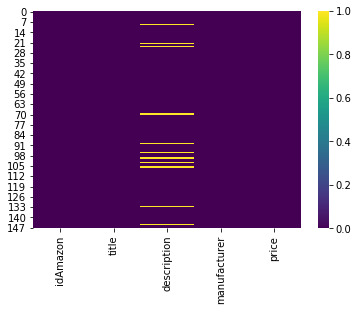

In [6]:
sns.heatmap(ams.isnull(), cmap="viridis")

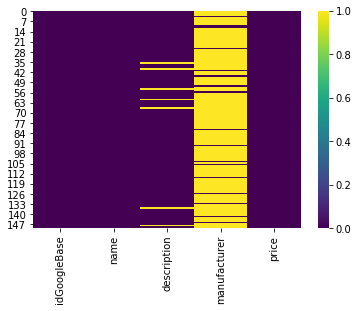

In [7]:
sns.heatmap(ggs.isnull(), cmap="viridis")

In [8]:
len(ggs)

150

In [9]:
len(ams)    # Amazon Google truth is 130 rows long

148

In [10]:
# Replacing all null values in both descriptions as an empty string
for indexA, rowA in ams.iterrows():
    if type(rowA['description']) == float:
        ams.at[indexA, 'description'] = ""
for indexG, rowG in ggs.iterrows():
    if type(rowG['description']) == float:
        ggs.at[indexG, 'description'] = ""
    if type(rowG['manufacturer']) == float:
        ggs.at[indexG, 'manufacturer'] = ""
# Nan types are actually float, easy to use since we are comparing with str

In [11]:
ams.iloc[145]

idAmazon                        b000h69szu
title             dk exotic animals africa
description                               
manufacturer    global software publishing
price                                 9.99
Name: 145, dtype: object

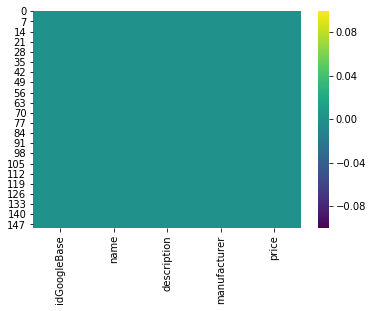

In [13]:
sns.heatmap(ggs.isnull(), cmap="viridis")

In [ ]:
# More preprocessing
for i, row in ams.iterrows():
    

In [14]:
df = pd.DataFrame(np.arange(12).reshape(3, 4),columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [15]:
for i,r in df.iterrows():
    print(df)
    df.drop(i, inplace=True)

   A  B   C   D
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
   A  B   C   D
1  4  5   6   7
2  8  9  10  11
   A  B   C   D
2  8  9  10  11


In [16]:
ams2 = ams.copy()
ggs2 = ggs.copy()

In [17]:
# Max score is 400, indicates perfect match
# Name, desc, manufacturer, price

ams_extra = []
#fuz, fuz, fuz, 1-(diff/100)
for indexA, rowA in ams2.iterrows():
    max_score = 0
    max_index = -1
    
    for indexG, rowG in ggs2.iterrows():
        score = fuzz.ratio(rowA['title'], rowG['name']) + fuzz.ratio(rowA['description'], rowG['description'])
        #print(fuzz.ratio(rowA['manufacturer'], rowG['manufacturer']))
        score += fuzz.ratio(rowA['manufacturer'], rowG['manufacturer']) + (1 - (abs(rowA['price'] - rowG['price'])/max([rowG['price'],rowA['price']])))*100
        #print(score)
        if(max_score <= score):
            max_score = score
            max_index = indexG
    # Max value received
    ams_extra.append((max_index, max_score))
    
    # Confirmation
    print((max_index, max_score))
    
    # Update records
    ams2.drop(indexA, inplace=True)
    ggs2.drop(max_index, inplace=True)
    

(93, 169.99839967993597)
(102, 154.9961508852964)
(142, 196.05454360730926)
(126, 156.40103941100045)
(34, 141.8341158059468)
(4, 169.11623246492985)
(54, 79.0)
(18, 184.2030203020302)
(10, 212.9974993748437)
(61, 123.0)
(76, 172.48080133555925)
(41, 145.66222074024674)
(86, 201.95959595959596)
(146, 152.74804626445763)
(122, 170.49196858514694)
(115, 285.5378106008154)
(103, 142.07607607607608)
(119, 199.999199839968)
(77, 157.0)
(52, 156.3013698630137)
(71, 150.99949997499874)
(32, 103.0)
(40, 231.71387753935826)
(82, 96.0)
(36, 223.24780976220276)
(133, 74.23846442692113)
(72, 144.51925192519252)
(30, 129.0495247623812)
(137, 159.36478826275425)
(37, 152.0)
(65, 146.0)
(107, 147.0)
(96, 149.99933328888594)
(45, 183.31943286071726)
(11, 174.44827586206895)
(100, 219.995995995996)
(135, 183.89494747373686)
(48, 152.998666222074)
(106, 209.0463695029702)
(56, 170.6230071897468)
(26, 112.0)
(124, 179.80916183236647)
(104, 158.77149248196747)
(145, 160.90699069906992)
(15, 140.0)
(74, 17

In [18]:
ams_link = []
for index, score in ams_extra:
    row = ggs.iloc[index]
    ams_link.append(ggs.iloc[index]['idGoogleBase'])

In [19]:
ams['idGoogleBase'] = ams_link

In [20]:
ams.head()

,idAmazon,title,description,manufacturer,price,idGoogleBase
0,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/1020...
1,b000pgvk5s,apple final cut studio 2 (mac),final cut studio 2 delivers an integrated post...,apple,1299.00,http://www.google.com/base/feeds/snippets/1872...
2,b0001wn0m2,microsoft office 2004 standard (mac),office 2004 standard is designed to be a total...,microsoft,399.99,http://www.google.com/base/feeds/snippets/1838...
3,b00004t2un,sales skills 2.0 ages 10+,real video saltware aquarium on your desktop!p...,victory multimedia,19.95,http://www.google.com/base/feeds/snippets/1842...
4,b000ov0gao,hollywood volume 1,contains the following songs: 1. arthur's them...,yamaha,31.95,http://www.google.com/base/feeds/snippets/1837...


In [21]:
link = pd.DataFrame([ams['idAmazon'], ams['idGoogleBase']])

In [22]:
link.head()

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
idAmazon,b0002itt84,b000pgvk5s,b0001wn0m2,b00004t2un,b000ov0gao,b000fdetxq,b0001y7poo,b000nvkyse,b000h13a2w,b0009jhv1s,...,b000h774k0,b0002yiuns,b000cditbc,b0009yegcu,b000067fk7,b000exw51k,b0007wv3ei,b000h69szu,b000ndib8m,b000qfrt4o
idGoogleBase,http://www.google.com/base/feeds/snippets/1020...,http://www.google.com/base/feeds/snippets/1872...,http://www.google.com/base/feeds/snippets/1838...,http://www.google.com/base/feeds/snippets/1842...,http://www.google.com/base/feeds/snippets/1837...,http://www.google.com/base/feeds/snippets/1574...,http://www.google.com/base/feeds/snippets/4468...,http://www.google.com/base/feeds/snippets/1492...,http://www.google.com/base/feeds/snippets/1049...,http://www.google.com/base/feeds/snippets/1542...,...,http://www.google.com/base/feeds/snippets/1732...,http://www.google.com/base/feeds/snippets/1056...,http://www.google.com/base/feeds/snippets/3785...,http://www.google.com/base/feeds/snippets/1329...,http://www.google.com/base/feeds/snippets/1837...,http://www.google.com/base/feeds/snippets/8175...,http://www.google.com/base/feeds/snippets/1327...,http://www.google.com/base/feeds/snippets/1171...,http://www.google.com/base/feeds/snippets/2927...,http://www.google.com/base/feeds/snippets/1478...


In [23]:
linkt = link.T
linkt.head()

,idAmazon,idGoogleBase
0,b0002itt84,http://www.google.com/base/feeds/snippets/1020...
1,b000pgvk5s,http://www.google.com/base/feeds/snippets/1872...
2,b0001wn0m2,http://www.google.com/base/feeds/snippets/1838...
3,b00004t2un,http://www.google.com/base/feeds/snippets/1842...
4,b000ov0gao,http://www.google.com/base/feeds/snippets/1837...


In [24]:
true_link = pd.read_csv("amazon_google_truth_small.csv")
true_link.head()

,idAmazon,idGoogleBase
0,b000hcz8ey,http://www.google.com/base/feeds/snippets/1111...
1,b00007e8d4,http://www.google.com/base/feeds/snippets/1695...
2,b000bb7fjw,http://www.google.com/base/feeds/snippets/1761...
3,b000gcbov6,http://www.google.com/base/feeds/snippets/7798...
4,b000bcz8ng,http://www.google.com/base/feeds/snippets/3077...


In [25]:
true_link.sort_values(by='idAmazon', inplace=True)
linkt.sort_values(by='idAmazon', inplace=True)

In [26]:
print(len(true_link))

130


In [27]:
print(len(linkt))

148


In [28]:
len(linkt['idAmazon'].unique())

148

In [29]:
count = 0
act_i = 0
for i, row in linkt.iterrows():
    if not(row['idAmazon'] in list(true_link['idAmazon'])):
        linkt.drop(i, inplace=True)
        count += 1
        print(i, count, act_i)
    act_i += 1
        
print(len(linkt))
print(len(true_link))
print(count)
true_link.sort_values(by='idAmazon', inplace=True)
linkt.sort_values(by='idAmazon', inplace=True)

34 1 3
84 2 28
81 3 32
97 4 33
27 5 41
105 6 52
79 7 53
44 8 56
71 9 72
95 10 77
125 11 80
33 12 82
113 13 90
111 14 101
145 15 102
118 16 114
13 17 115
25 18 118
147 19 144
129
130
19


In [30]:
linkt.iloc[3]['idGoogleBase'] in list(true_link['idAmazon'])

False

In [31]:
true_link['idAmazon']

65     1931102953
122    b00002s6sc
15     b00004nhn7
40     b00004t2un
84     b000051sgq
56     b000067fk7
49     b00006gxbz
18     b00006h3dw
26     b00006sijr
22     b00007bguc
1      b00007e8d4
13     b00008mnxq
95     b0000dk573
28     b0000ycfe0
79     b00013wh0w
125    b0001d56uu
10     b0001fyrq2
104    b0001h9l5m
110    b0001iqnc0
42     b0001wn0m2
116    b0001wn16m
71     b0001y7poo
129    b00022pti4
119    b0002735fi
66     b00027eqmy
88     b0002ibeve
100    b0002itt84
89     b0002x9a1u
96     b0002yiuns
75     b00030cbu4
          ...    
9      b000j588g4
36     b000jgqt28
57     b000k6b2l0
33     b000k7vinq
115    b000kbszns
45     b000licg1m
93     b000lrdlia
20     b000m6wlyk
17     b000n5meva
14     b000ndib8m
70     b000ndib96
43     b000ndibbo
16     b000ndibws
123    b000nif4im
102    b000nkj29c
85     b000nkklwy
59     b000nknb62
51     b000nvkyse
97     b000o8gs3g
50     b000ov0gao
90     b000ov404w
24     b000ozhfsq
6      b000pdomn8
47     b000pgvk5s
111    b00

In [32]:
count = 0
for i, row in linkt.iterrows():
    true_row = true_link[true_link['idAmazon']==row['idAmazon']]['idGoogleBase']
    #print(list(true_row))
    if list(true_row)[0] == row['idGoogleBase']:
        count += 1
print(count)
print(count/len(linkt))

62
0.4806201550387597


In [33]:
true_link.sort_values(by=['idAmazon'])

,idAmazon,idGoogleBase
65,1931102953,http://www.google.com/base/feeds/snippets/1272...
122,b00002s6sc,http://www.google.com/base/feeds/snippets/1049...
15,b00004nhn7,http://www.google.com/base/feeds/snippets/1843...
40,b00004t2un,http://www.google.com/base/feeds/snippets/1750...
84,b000051sgq,http://www.google.com/base/feeds/snippets/1758...
56,b000067fk7,http://www.google.com/base/feeds/snippets/3785...
49,b00006gxbz,http://www.google.com/base/feeds/snippets/9070...
18,b00006h3dw,http://www.google.com/base/feeds/snippets/1725...
26,b00006sijr,http://www.google.com/base/feeds/snippets/1062...
22,b00007bguc,http://www.google.com/base/feeds/snippets/1796...


In [34]:
linkt.to_csv("task1a.csv", index=False)